<a href="https://colab.research.google.com/github/shahriyarredlearn/eye_dataset/blob/main/eye_shit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%run "C:/Users/shahr/colab_init.py"


✅ Optimizations Applied:
Total CPU Cores: 16
CPU Utilization per Core: [33.3, 46.2, 23.4, 18.8, 18.8, 23.4, 7.8, 12.5, 1.6, 3.1, 10.9, 6.2, 36.4, 38.5, 18.5, 6.2]


In [7]:
import os
import zipfile

# Define local path
local_path = r"C:\Users\shahr\Downloads\eye dataset.zip"

# Define extraction path
extract_path = r"C:\Users\shahr\Downloads\eye_dataset"

# Ensure the extraction directory exists
os.makedirs(extract_path, exist_ok=True)

# Unzip the dataset
with zipfile.ZipFile(local_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

# Define the dataset directory
base_dir = extract_path

# Define common image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Count images in all subfolders
image_count = 0
for root, dirs, files in os.walk(base_dir):
    image_count += sum(1 for file in files if file.lower().endswith(image_extensions))

print(f"Total image count: {image_count}")


Dataset extracted successfully!
Total image count: 5578


In [8]:
# Dictionary to store the count of images per class
class_image_counts = {}

# Iterate through subdirectories and count images
for root, dirs, files in os.walk(base_dir):
    if root != base_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count

# Display the count of images per class
print("Image count per class:")
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count}")

# Print total image count
total_images = sum(class_image_counts.values())
print(f"Total image count: {total_images}")

Image count per class:
Original Dataset: 0
Central Serous Chorioretinopathy Color Fundus: 101
Diabetic Retinopathy: 1509
Disc Edema: 127
Glaucoma: 1349
Healthy: 1024
Macular Scar: 444
Myopia: 500
Retinal Detachment: 125
Retinitis Pigmentosa: 139
Within Normal Limit WNL: 260
Total image count: 5578


In [9]:
import os
import shutil
import random

# Path to the dataset directory
base_dir = r"C:\Users\shahr\Downloads\eye_dataset"

# Output directories for the splits
output_dir = r"C:\Users\shahr\Downloads\Splitted"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

# Valid image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.JPEG')

# Train, validation, and test split ratios
train_ratio = 0.6
val_ratio = 0.3
test_ratio = 0.1

# Ensure output directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through subdirectories and process images
for root, dirs, files in os.walk(base_dir):
    if root != base_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Name of the subfolder (class)
        image_files = [file for file in files if file.lower().endswith(image_extensions)]  # Valid image files

        # Shuffle the files for randomness
        random.shuffle(image_files)

        # Split indices
        total_images = len(image_files)
        train_end = int(total_images * train_ratio)
        val_end = train_end + int(total_images * val_ratio)

        train_files = image_files[:train_end]
        val_files = image_files[train_end:val_end]
        test_files = image_files[val_end:]

        # Function to copy files to the destination directory
        def copy_files(file_list, destination_dir):
            os.makedirs(destination_dir, exist_ok=True)
            for file in file_list:
                src = os.path.join(root, file)
                dst = os.path.join(destination_dir, class_name, file)
                os.makedirs(os.path.dirname(dst), exist_ok=True)
                shutil.copy2(src, dst)

        # Copy the files
        copy_files(train_files, train_dir)
        copy_files(val_files, val_dir)
        copy_files(test_files, test_dir)

# Output summary
print("Dataset split completed!")
print(f"Train directory: {train_dir}")
print(f"Validation directory: {val_dir}")
print(f"Test directory: {test_dir}")


Dataset split completed!
Train directory: C:\Users\shahr\Downloads\Splitted\train
Validation directory: C:\Users\shahr\Downloads\Splitted\val
Test directory: C:\Users\shahr\Downloads\Splitted\test


In [10]:
import os

# Define the base directory for the training set
train_dir = r"C:\Users\shahr\Downloads\Splitted\train"

# Define common image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Dictionary to store the count of images per class
class_image_counts = {}

# Count images in all subfolders
total_image_count = 0
for root, dirs, files in os.walk(train_dir):
    if root != train_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count
        total_image_count += image_count

# Print image count per class
print("Image count per class in train set:")
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count}")

# Print total image count
print(f"Total images in train set: {total_image_count}")


Image count per class in train set:
Central Serous Chorioretinopathy Color Fundus: 1025
Diabetic Retinopathy: 1376
Disc Edema: 1023
Glaucoma: 1329
Healthy: 1237
Macular Scar: 1108
Myopia: 1120
Retinal Detachment: 1032
Retinitis Pigmentosa: 1029
Within Normal Limit WNL: 1066
Total images in train set: 11345


In [11]:
# Dictionary to store the count of images per class
class_image_counts = {}

# Iterate through subdirectories and count images
for root, dirs, files in os.walk(train_dir):
    if root != train_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count

class_image_counts

{'Central Serous Chorioretinopathy Color Fundus': 1025,
 'Diabetic Retinopathy': 1376,
 'Disc Edema': 1023,
 'Glaucoma': 1329,
 'Healthy': 1237,
 'Macular Scar': 1108,
 'Myopia': 1120,
 'Retinal Detachment': 1032,
 'Retinitis Pigmentosa': 1029,
 'Within Normal Limit WNL': 1066}

In [12]:
import os

# Define the base directory for the validation set
val_dir = r"C:\Users\shahr\Downloads\Splitted\val"

# Define common image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Dictionary to store the count of images per class
class_image_counts = {}

# Count images in all subfolders
total_image_count = 0
for root, dirs, files in os.walk(val_dir):
    if root != val_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count
        total_image_count += image_count

# Print image count per class
print("Image count per class in validation set:")
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count}")

# Print total image count
print(f"Total images in validation set: {total_image_count}")


Image count per class in validation set:
Central Serous Chorioretinopathy Color Fundus: 51
Diabetic Retinopathy: 767
Disc Edema: 58
Glaucoma: 698
Healthy: 515
Macular Scar: 218
Myopia: 262
Retinal Detachment: 67
Retinitis Pigmentosa: 68
Within Normal Limit WNL: 129
Total images in validation set: 2833


In [13]:
# Dictionary to store the count of images per class
class_image_counts = {}

# Iterate through subdirectories and count images
for root, dirs, files in os.walk(val_dir):
    if root != val_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count

class_image_counts

{'Central Serous Chorioretinopathy Color Fundus': 51,
 'Diabetic Retinopathy': 767,
 'Disc Edema': 58,
 'Glaucoma': 698,
 'Healthy': 515,
 'Macular Scar': 218,
 'Myopia': 262,
 'Retinal Detachment': 67,
 'Retinitis Pigmentosa': 68,
 'Within Normal Limit WNL': 129}

In [14]:
import os

# Define the base directory for the validation set
val_dir = r"C:\Users\shahr\Downloads\Splitted\test"
# Define common image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')

# Count images in all subfolders
image_count = 0
for root, dirs, files in os.walk(test_dir):
    image_count += sum(1 for file in files if file.lower().endswith(image_extensions))

image_count

1062

In [15]:
# Dictionary to store the count of images per class
class_image_counts = {}

# Iterate through subdirectories and count images
for root, dirs, files in os.walk(test_dir):
    if root != test_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count

class_image_counts

{'Central Serous Chorioretinopathy Color Fundus': 20,
 'Diabetic Retinopathy': 286,
 'Disc Edema': 24,
 'Glaucoma': 259,
 'Healthy': 188,
 'Macular Scar': 87,
 'Myopia': 95,
 'Retinal Detachment': 24,
 'Retinitis Pigmentosa': 29,
 'Within Normal Limit WNL': 50}

In [16]:
import os
import random
from PIL import Image, ImageOps
import uuid

# Base directory of the dataset
base_dir = r"C:\Users\shahr\Downloads\Splitted\train"

# Classes and their respective image counts
classes_info = {
    'Macular Scar': 310,
    'Glaucoma': 944,
    'Central Serous Chorioretinopathy Color Fundus': 70,
    'Disc Edema': 88,
    'Myopia': 350,
    'Retinitis Pigmentosa': 97,
    'Healthy': 716,
    'Haemorrhagic Retinopathy HR': 58,
    'Retinal Detachment': 87,
    'Within Normal Limit WNL': 182,
    'Pterygium': 11,
    'Diabetic Retinopathy': 1056
}

# Target number of images per class
min_images = 1000

def augment_image(image_path, output_dir):
    """Augments an image by applying random transformations and saves the augmented image."""
    img = Image.open(image_path)

    # Apply random transformations
    if random.choice([True, False]):
        img = ImageOps.mirror(img)
    if random.choice([True, False]):
        img = ImageOps.flip(img)
    if random.choice([True, False]):
        img = img.rotate(random.randint(-45, 45))

    # Generate a unique filename
    unique_name = f"{os.path.splitext(os.path.basename(image_path))[0]}_{uuid.uuid4().hex[:8]}.jpeg"

    # Save the augmented image
    img.save(os.path.join(output_dir, unique_name))

# Get existing classes in training directory
existing_classes = set(os.listdir(base_dir))

# Filter out missing classes
filtered_classes_info = {cls: count for cls, count in classes_info.items() if cls in existing_classes}

# Oversample classes with less than 1000 images
for class_name, image_count in filtered_classes_info.items():
    class_dir = os.path.join(base_dir, class_name)

    if not os.path.exists(class_dir):  # Extra check for safety
        print(f"Skipping {class_name}: Directory not found.")
        continue

    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    if not images:
        print(f"Skipping {class_name}: No images found in directory {class_dir}.")
        continue  # Skip this class if no images are available

    # Check if augmentation is needed
    current_count = len(images)
    if current_count >= min_images:
        print(f"{class_name} already has {current_count} images, no augmentation needed.")
        continue

    # Calculate how many images need to be added
    num_images_needed = min_images - current_count
    print(f"Augmenting {class_name}: Adding {num_images_needed} images.")

    for _ in range(num_images_needed):
        image_path = random.choice(images)
        augment_image(image_path, class_dir)

    # Validate the final count
    final_count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])
    print(f"After augmentation, {class_name} has {final_count} images.")

# Verify final counts
final_counts = {class_name: len([f for f in os.listdir(os.path.join(base_dir, class_name)) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]) for class_name in filtered_classes_info}

print("\nFinal image counts after augmentation:")
for class_name, count in final_counts.items():
    print(f"{class_name}: {count}")


Macular Scar already has 1108 images, no augmentation needed.
Glaucoma already has 1329 images, no augmentation needed.
Central Serous Chorioretinopathy Color Fundus already has 1025 images, no augmentation needed.
Disc Edema already has 1023 images, no augmentation needed.
Myopia already has 1120 images, no augmentation needed.
Retinitis Pigmentosa already has 1029 images, no augmentation needed.
Healthy already has 1237 images, no augmentation needed.
Retinal Detachment already has 1032 images, no augmentation needed.
Within Normal Limit WNL already has 1066 images, no augmentation needed.
Diabetic Retinopathy already has 1376 images, no augmentation needed.

Final image counts after augmentation:
Macular Scar: 1108
Glaucoma: 1329
Central Serous Chorioretinopathy Color Fundus: 1025
Disc Edema: 1023
Myopia: 1120
Retinitis Pigmentosa: 1029
Healthy: 1237
Retinal Detachment: 1032
Within Normal Limit WNL: 1066
Diabetic Retinopathy: 1376


In [17]:
# Dictionary to store the count of images per class
class_image_counts = {}

# Iterate through subdirectories and count images
for root, dirs, files in os.walk(train_dir):
    if root != train_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count

class_image_counts

{'Central Serous Chorioretinopathy Color Fundus': 1025,
 'Diabetic Retinopathy': 1376,
 'Disc Edema': 1023,
 'Glaucoma': 1329,
 'Healthy': 1237,
 'Macular Scar': 1108,
 'Myopia': 1120,
 'Retinal Detachment': 1032,
 'Retinitis Pigmentosa': 1029,
 'Within Normal Limit WNL': 1066}

In [18]:
import os
import random
from PIL import Image, ImageOps
import uuid

# Base directory of the dataset
base_dir = r"C:\Users\shahr\Downloads\Splitted\val"

# Classes and their respective image counts
classes_info = {
    'Diabetic Retinopathy': 301,
    'Central Serous Chorioretinopathy Color Fundus': 20,
    'Healthy': 204,
    'Myopia': 100,
    'Retinitis Pigmentosa': 27,
    'Macular Scar': 88,
    'Within Normal Limit WNL': 52,
    'Retinal Detachment': 25,
    'Pterygium': 3,  # This class is missing
    'Haemorrhagic Retinopathy HR': 16,
    'Glaucoma': 269,
    'Disc Edema': 25
}

# Target number of images per class
min_images = 300

def augment_image(image_path, output_dir):
    """Applies random transformations to an image and saves an augmented version."""
    img = Image.open(image_path)

    # Apply random transformations
    if random.choice([True, False]):
        img = ImageOps.mirror(img)
    if random.choice([True, False]):
        img = ImageOps.flip(img)
    if random.choice([True, False]):
        img = img.rotate(random.randint(-45, 45))

    # Generate a unique filename
    unique_name = f"{os.path.splitext(os.path.basename(image_path))[0]}_{uuid.uuid4().hex[:8]}.jpeg"

    # Save the augmented image
    img.save(os.path.join(output_dir, unique_name))

# Get existing classes in validation directory
existing_classes = set(os.listdir(base_dir))

# Filter out missing classes
filtered_classes_info = {cls: count for cls, count in classes_info.items() if cls in existing_classes}

# Oversample classes with less than 300 images
for class_name, image_count in filtered_classes_info.items():
    class_dir = os.path.join(base_dir, class_name)

    if not os.path.exists(class_dir):  # Extra safety check
        print(f"Skipping {class_name}: Directory not found.")
        continue

    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    if not images:
        print(f"Skipping {class_name}: No images found.")
        continue  # Skip this class if no images are available

    # Check if augmentation is needed
    current_count = len(images)
    if current_count >= min_images:
        print(f"{class_name} already has {current_count} images, no augmentation needed.")
        continue

    # Calculate how many images need to be added
    num_images_needed = min_images - current_count
    print(f"Augmenting {class_name}: Adding {num_images_needed} images.")

    for _ in range(num_images_needed):
        image_path = random.choice(images)
        augment_image(image_path, class_dir)

    # Validate the final count
    final_count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])
    print(f"After augmentation, {class_name} has {final_count} images.")

# Verify final counts
final_counts = {class_name: len([f for f in os.listdir(os.path.join(base_dir, class_name)) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]) for class_name in filtered_classes_info}

print("\nFinal image counts after augmentation:")
for class_name, count in final_counts.items():
    print(f"{class_name}: {count}")


Diabetic Retinopathy already has 767 images, no augmentation needed.
Augmenting Central Serous Chorioretinopathy Color Fundus: Adding 249 images.
After augmentation, Central Serous Chorioretinopathy Color Fundus has 300 images.
Healthy already has 515 images, no augmentation needed.
Augmenting Myopia: Adding 38 images.
After augmentation, Myopia has 300 images.
Augmenting Retinitis Pigmentosa: Adding 232 images.
After augmentation, Retinitis Pigmentosa has 300 images.
Augmenting Macular Scar: Adding 82 images.
After augmentation, Macular Scar has 300 images.
Augmenting Within Normal Limit WNL: Adding 171 images.
After augmentation, Within Normal Limit WNL has 300 images.
Augmenting Retinal Detachment: Adding 233 images.
After augmentation, Retinal Detachment has 300 images.
Glaucoma already has 698 images, no augmentation needed.
Augmenting Disc Edema: Adding 242 images.
After augmentation, Disc Edema has 300 images.

Final image counts after augmentation:
Diabetic Retinopathy: 767
Cen

In [19]:
# Dictionary to store the count of images per class
class_image_counts = {}

# Iterate through subdirectories and count images
for root, dirs, files in os.walk(val_dir):
    if root != val_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count

class_image_counts

{'Central Serous Chorioretinopathy Color Fundus': 20,
 'Diabetic Retinopathy': 286,
 'Disc Edema': 24,
 'Glaucoma': 259,
 'Healthy': 188,
 'Macular Scar': 87,
 'Myopia': 95,
 'Retinal Detachment': 24,
 'Retinitis Pigmentosa': 29,
 'Within Normal Limit WNL': 50}

In [20]:
import os
import random
from PIL import Image, ImageOps
import uuid

# Base directory of the test dataset
base_dir = r"C:\Users\shahr\Downloads\Splitted\test"

# Classes and their respective image counts
classes_info = {
    'Diabetic Retinopathy': 152,
    'Central Serous Chorioretinopathy Color Fundus': 11,
    'Healthy': 104,
    'Myopia': 50,
    'Retinitis Pigmentosa': 15,
    'Macular Scar': 46,
    'Within Normal Limit WNL': 26,
    'Retinal Detachment': 13,
    'Pterygium': 3,  # This class is missing
    'Haemorrhagic Retinopathy HR': 10,
    'Glaucoma': 136,
    'Disc Edema': 14
}

# Target number of images per class
min_images = 150

def augment_image(image_path, output_dir):
    """Applies random transformations to an image and saves the augmented image."""
    img = Image.open(image_path)

    # Apply random transformations
    if random.choice([True, False]):
        img = ImageOps.mirror(img)
    if random.choice([True, False]):
        img = ImageOps.flip(img)
    if random.choice([True, False]):
        img = img.rotate(random.randint(-45, 45))

    # Generate a unique filename
    unique_name = f"{os.path.splitext(os.path.basename(image_path))[0]}_{uuid.uuid4().hex[:8]}.jpeg"

    # Save the augmented image
    img.save(os.path.join(output_dir, unique_name))

# Get existing classes in test directory
existing_classes = set(os.listdir(base_dir))

# Filter out missing classes
filtered_classes_info = {cls: count for cls, count in classes_info.items() if cls in existing_classes}

# Oversample classes with less than 150 images
for class_name, image_count in filtered_classes_info.items():
    class_dir = os.path.join(base_dir, class_name)

    if not os.path.exists(class_dir):  # Extra safety check
        print(f"Skipping {class_name}: Directory not found.")
        continue

    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    if not images:
        print(f"Skipping {class_name}: No images found.")
        continue  # Skip this class if no images are available

    # Check if augmentation is needed
    current_count = len(images)
    if current_count >= min_images:
        print(f"{class_name} already has {current_count} images, no augmentation needed.")
        continue

    # Calculate how many images need to be added
    num_images_needed = min_images - current_count
    print(f"Augmenting {class_name}: Adding {num_images_needed} images.")

    for _ in range(num_images_needed):
        image_path = random.choice(images)
        augment_image(image_path, class_dir)

    # Validate the final count
    final_count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])
    print(f"After augmentation, {class_name} has {final_count} images.")

# Verify final counts
final_counts = {
    class_name: len([f for f in os.listdir(os.path.join(base_dir, class_name)) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))])
    for class_name in filtered_classes_info
}

print("\nFinal image counts after augmentation:")
for class_name, count in final_counts.items():
    print(f"{class_name}: {count}")


Diabetic Retinopathy already has 286 images, no augmentation needed.
Augmenting Central Serous Chorioretinopathy Color Fundus: Adding 130 images.
After augmentation, Central Serous Chorioretinopathy Color Fundus has 150 images.
Healthy already has 188 images, no augmentation needed.
Augmenting Myopia: Adding 55 images.
After augmentation, Myopia has 150 images.
Augmenting Retinitis Pigmentosa: Adding 121 images.
After augmentation, Retinitis Pigmentosa has 150 images.
Augmenting Macular Scar: Adding 63 images.
After augmentation, Macular Scar has 150 images.
Augmenting Within Normal Limit WNL: Adding 100 images.
After augmentation, Within Normal Limit WNL has 150 images.
Augmenting Retinal Detachment: Adding 126 images.
After augmentation, Retinal Detachment has 150 images.
Glaucoma already has 259 images, no augmentation needed.
Augmenting Disc Edema: Adding 126 images.
After augmentation, Disc Edema has 150 images.

Final image counts after augmentation:
Diabetic Retinopathy: 286
Cen

In [21]:
# Dictionary to store the count of images per class
class_image_counts = {}

# Iterate through subdirectories and count images
for root, dirs, files in os.walk(test_dir):
    if root != test_dir:  # Skip the base directory itself
        class_name = os.path.basename(root)  # Get the name of the class (subfolder)
        image_count = sum(1 for file in files if file.lower().endswith(image_extensions))
        class_image_counts[class_name] = image_count

class_image_counts

{'Central Serous Chorioretinopathy Color Fundus': 150,
 'Diabetic Retinopathy': 286,
 'Disc Edema': 150,
 'Glaucoma': 259,
 'Healthy': 188,
 'Macular Scar': 150,
 'Myopia': 150,
 'Retinal Detachment': 150,
 'Retinitis Pigmentosa': 150,
 'Within Normal Limit WNL': 150}

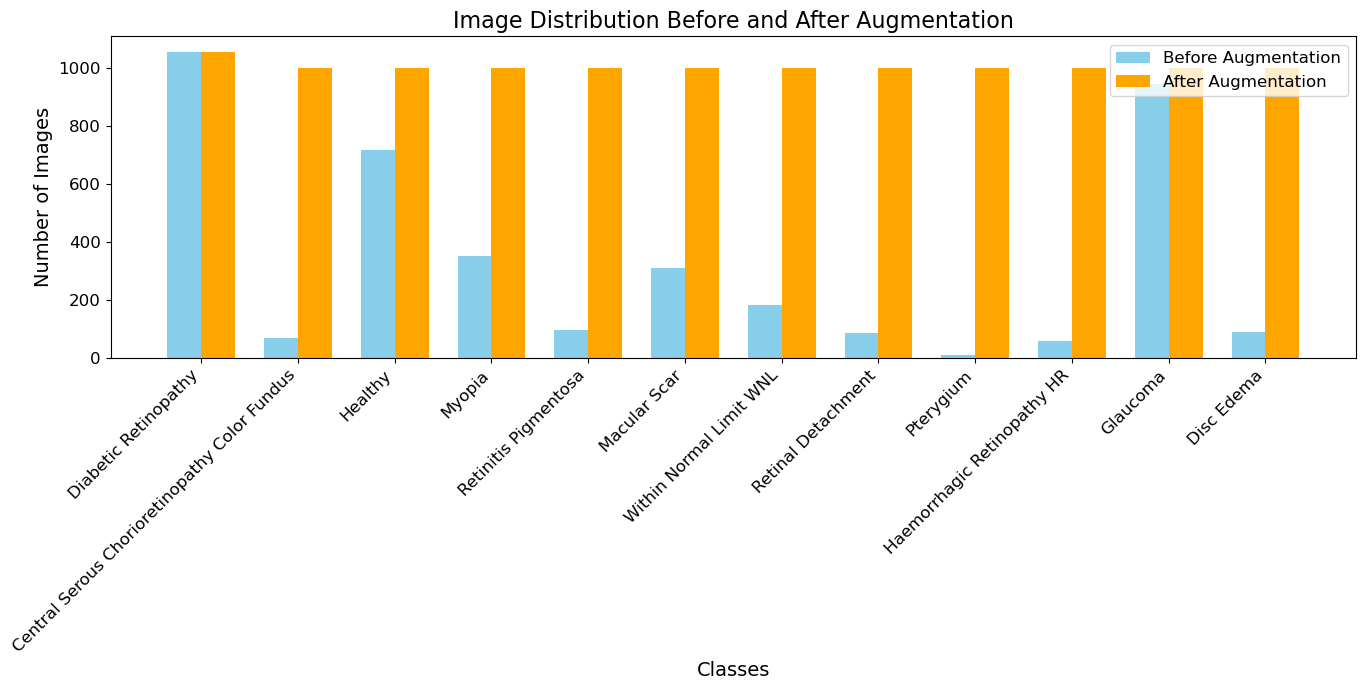

In [22]:
import matplotlib.pyplot as plt

# Data for the classes before and after augmentation
before_augmentation = {'Diabetic Retinopathy': 1056,
 'Central Serous Chorioretinopathy Color Fundus': 70,
 'Healthy': 716,
 'Myopia': 350,
 'Retinitis Pigmentosa': 97,
 'Macular Scar': 310,
 'Within Normal Limit WNL': 182,
 'Retinal Detachment': 87,
 'Pterygium': 11,
 'Haemorrhagic Retinopathy HR': 58,
 'Glaucoma': 944,
 'Disc Edema': 88}

after_augmentation = {'Diabetic Retinopathy': 1056,
 'Central Serous Chorioretinopathy Color Fundus': 1000,
 'Healthy': 1000,
 'Myopia': 1000,
 'Retinitis Pigmentosa': 1000,
 'Macular Scar': 1000,
 'Within Normal Limit WNL': 1000,
 'Retinal Detachment': 1000,
 'Pterygium': 1000,
 'Haemorrhagic Retinopathy HR': 1000,
 'Glaucoma': 1000,
 'Disc Edema': 1000}

# Create the distribution plot
plt.figure(figsize=(14, 7))
bar_width = 0.35
x_labels = list(before_augmentation.keys())
x = range(len(x_labels))

plt.bar(x, before_augmentation.values(), width=bar_width, label='Before Augmentation', color='skyblue')
plt.bar([p + bar_width for p in x], after_augmentation.values(), width=bar_width, label='After Augmentation', color='orange')

plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Image Distribution Before and After Augmentation', fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], x_labels, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

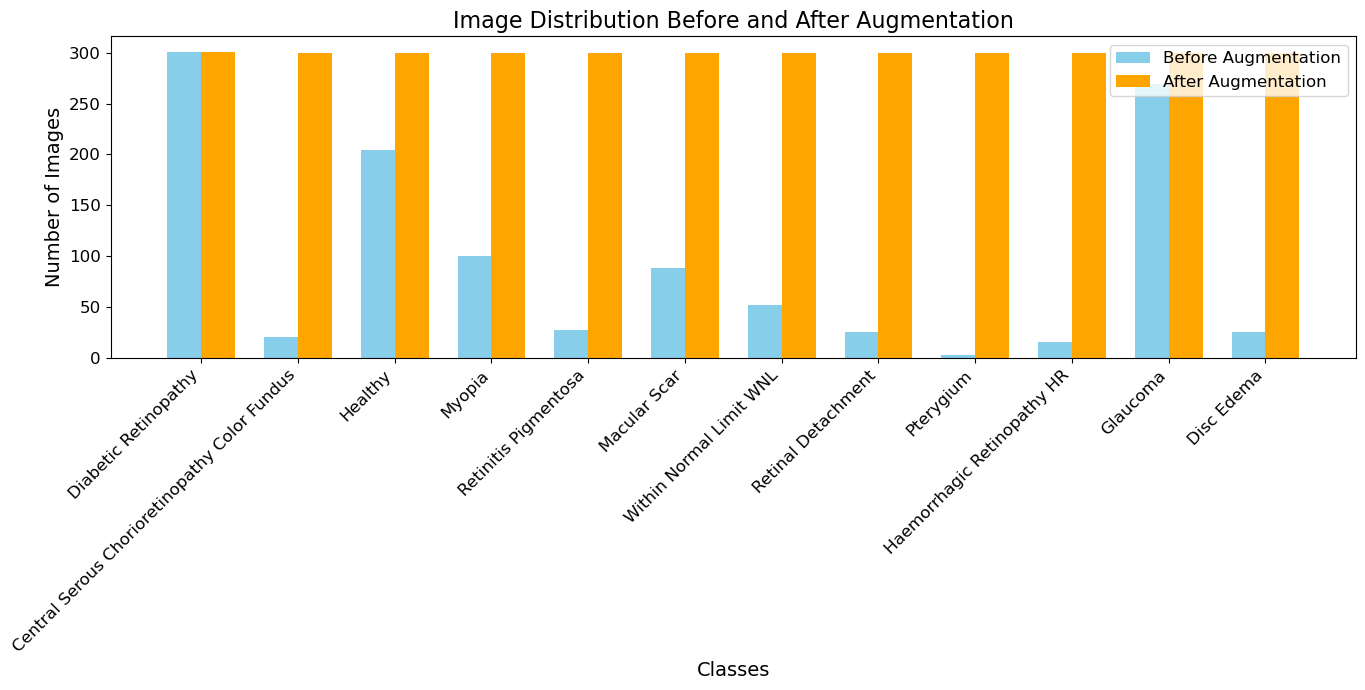

In [23]:
import matplotlib.pyplot as plt

# Data for the classes before and after augmentation
before_augmentation = {'Diabetic Retinopathy': 301,
 'Central Serous Chorioretinopathy Color Fundus': 20,
 'Healthy': 204,
 'Myopia': 100,
 'Retinitis Pigmentosa': 27,
 'Macular Scar': 88,
 'Within Normal Limit WNL': 52,
 'Retinal Detachment': 25,
 'Pterygium': 3,
 'Haemorrhagic Retinopathy HR': 16,
 'Glaucoma': 269,
 'Disc Edema': 25}

after_augmentation = {'Diabetic Retinopathy': 301,
 'Central Serous Chorioretinopathy Color Fundus': 300,
 'Healthy': 300,
 'Myopia': 300,
 'Retinitis Pigmentosa': 300,
 'Macular Scar': 300,
 'Within Normal Limit WNL': 300,
 'Retinal Detachment': 300,
 'Pterygium': 300,
 'Haemorrhagic Retinopathy HR': 300,
 'Glaucoma': 300,
 'Disc Edema': 300}

# Create the distribution plot
plt.figure(figsize=(14, 7))
bar_width = 0.35
x_labels = list(before_augmentation.keys())
x = range(len(x_labels))

plt.bar(x, before_augmentation.values(), width=bar_width, label='Before Augmentation', color='skyblue')
plt.bar([p + bar_width for p in x], after_augmentation.values(), width=bar_width, label='After Augmentation', color='orange')

plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Image Distribution Before and After Augmentation', fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], x_labels, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

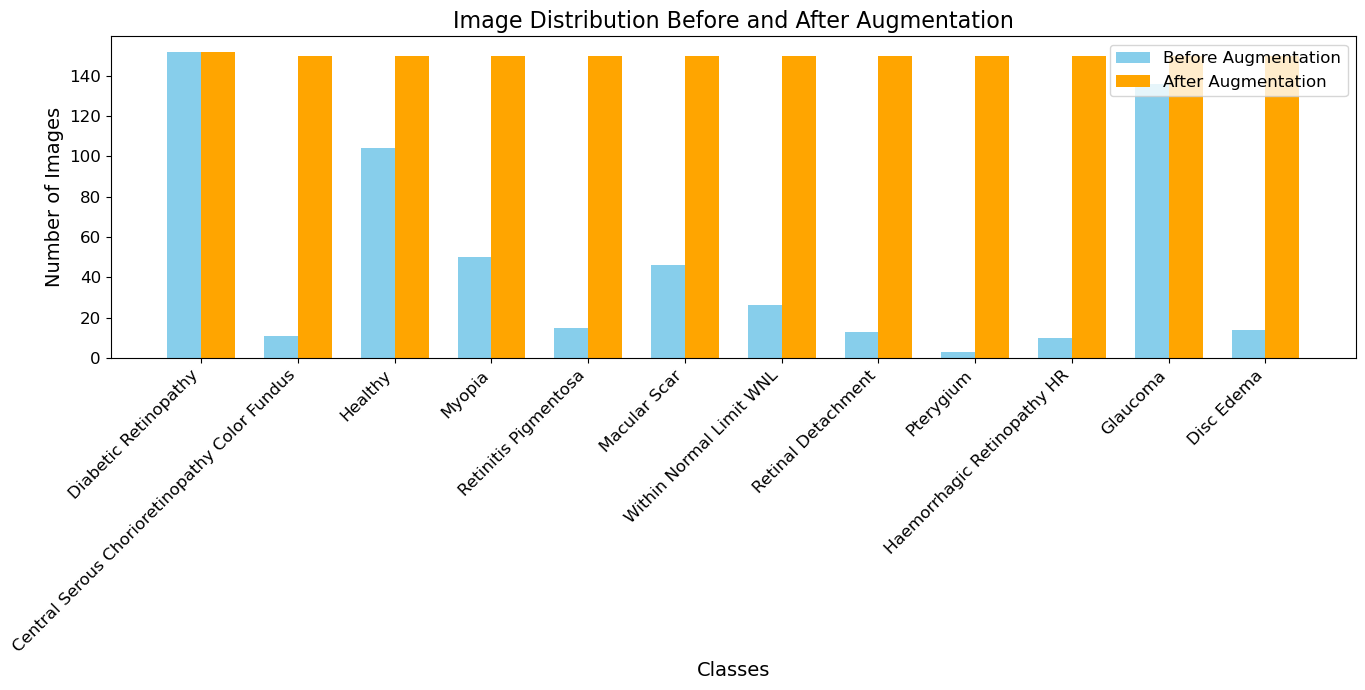

In [24]:
import matplotlib.pyplot as plt

# Data for the classes before and after augmentation
before_augmentation = {'Diabetic Retinopathy': 152,
 'Central Serous Chorioretinopathy Color Fundus': 11,
 'Healthy': 104,
 'Myopia': 50,
 'Retinitis Pigmentosa': 15,
 'Macular Scar': 46,
 'Within Normal Limit WNL': 26,
 'Retinal Detachment': 13,
 'Pterygium': 3,
 'Haemorrhagic Retinopathy HR': 10,
 'Glaucoma': 136,
 'Disc Edema': 14}

after_augmentation = {'Diabetic Retinopathy': 152,
 'Central Serous Chorioretinopathy [Color Fundus]': 150,
 'Healthy': 150,
 'Myopia': 150,
 'Retinitis Pigmentosa': 150,
 'Macular Scar': 150,
 'Within Normal Limit WNL': 150,
 'Retinal Detachment': 150,
 'Pterygium': 150,
 'Haemorrhagic Retinopathy HR': 150,
 'Glaucoma': 150,
 'Disc Edema': 150}

# Create the distribution plot
plt.figure(figsize=(14, 7))
bar_width = 0.35
x_labels = list(before_augmentation.keys())
x = range(len(x_labels))

plt.bar(x, before_augmentation.values(), width=bar_width, label='Before Augmentation', color='skyblue')
plt.bar([p + bar_width for p in x], after_augmentation.values(), width=bar_width, label='After Augmentation', color='orange')

plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Image Distribution Before and After Augmentation', fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], x_labels, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
!pip install grad-cam
!pip install torchcam
!pip install timm pytorch-grad-cam

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
     -------- ------------------------------- 1.6/7.8 MB 4.7 MB/s eta 0:00:02
     ----------------- ---------------------- 3.4/7.8 MB 6.7 MB/s eta 0:00:01
     -------------------------- ------------- 5.2/7.8 MB 7.4 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.8 MB 8.4 MB/s eta 0:00:01
     ---------------------------------------- 7.8/7.8 MB 7.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 2.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/15.5 MB 3.7 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/15.5 MB 3.7 MB/s eta 0:00:04
   -------- ------------------------------- 3.1/15.5 MB 4.2 MB/s eta 0:00:03
   ----------- ---------------------------- 4.5/15.5 MB 4.6 MB/s eta 0:00:03
   ---------------- ----------------------- 6.3/15.5 MB 5.4 MB/s eta 0:00:02
   ---------------------- ----------------- 8.7/15.5 MB 6.3 MB/s eta 0:00:02
   ---------------------------- ----------- 11.0/15.5 MB 6.9 MB/s eta 0:00:01
   ---------------------------------- ----- 13.4/15.5 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.5 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.5 MB 7.7 MB/s eta 0:00:01
 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pytorch-grad-cam (from versions: none)
ERROR: No matching distribution found for pytorch-grad-cam


In [28]:
!pip install timm


Defaulting to user installation because normal site-packages is not writeable
  Using cached timm-1.0.14-py3-none-any.whl.metadata (50 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   ---------------------- ----------------- 1.3/2.4 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 5.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


import os
import torch
import psutil  # For CPU monitoring
from torch.utils.data import DataLoader, Subset, Dataset
from sklearn.model_selection import KFold
from torchvision import transforms
import timm
from tqdm.notebook import tqdm
import numpy as np
from PIL import Image
import torch.nn as nn # Import the nn module


# Ensure maximum CPU utilization
torch.set_num_threads(os.cpu_count())

# Enable cuDNN benchmark mode for performance boost
torch.backends.cudnn.benchmark = True

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(f"CPU Cores Available: {os.cpu_count()}")

# Define classes
CLASSES = [
    'Within Normal Limit WNL',
    'Central Serous Chorioretinopathy Color Fundus',
    'Diabetic Retinopathy',
    'Healthy',
    'Glaucoma',
    'Retinal Detachment',
    'Myopia',
    'Disc Edema',
    'Retinitis Pigmentosa',
    'Macular Scar'
]

# Image transformations
train_transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom Dataset Class
class EyeDiseaseDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(CLASSES)}

        for class_name in CLASSES:
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.samples.append((
                            os.path.join(class_dir, img_name),
                            self.class_to_idx[class_name]
                        ))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {str(e)}")
            return torch.zeros((3, 299, 299)), label

# Training function
def train_one_epoch(model, train_loader, criterion, optimizer, scheduler, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    pbar = tqdm(train_loader, desc='Training')

    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update progress bar
        pbar.set_postfix({
            'loss': f'{running_loss/total:.3f}',
            'acc': f'{100.*correct/total:.2f}%'
        })

    return running_loss / len(train_loader), 100. * correct / total

# Validation function
def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            pbar.set_postfix({
                'loss': f'{running_loss/total:.3f}',
                'acc': f'{100.*correct/total:.2f}%'
            })
    
    return running_loss / len(val_loader), 100. * correct / total, all_preds, all_labels

def main():
    print(f"RAM Usage Before Training: {psutil.virtual_memory().percent}%")

    # Dataset Paths
    train_dir = r"C:\Users\shahr\Downloads\Splitted\train"
    val_dir = r"C:\Users\shahr\Downloads\Splitted\val"

    # Load dataset
    train_dataset = EyeDiseaseDataset(root_dir=train_dir, transform=train_transforms)
    val_dataset = EyeDiseaseDataset(root_dir=val_dir, transform=val_transforms)

    print(f"Train dataset contains {len(train_dataset)} images")
    print(f"Validation dataset contains {len(val_dataset)} images")

    # Ensure dataset is not empty
    if len(train_dataset) == 0 or len(val_dataset) == 0:
        raise ValueError("Dataset is empty! Check dataset path and structure.")

    # K-Fold cross-validation
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_results = []

    num_workers = min(os.cpu_count(), 8)  # Increase workers
    batch_size = 32  # Higher batch size for better CPU utilization

    for fold, (train_idx, val_idx) in enumerate(kfold.split(train_dataset), 1):
        print(f"\nTraining Fold {fold}/{n_splits}")

        train_subset = Subset(train_dataset, train_idx)
        val_subset = Subset(val_dataset, val_idx)

        train_loader = DataLoader(train_subset, batch_size=batch_size, num_workers=num_workers,
                                  pin_memory=True, prefetch_factor=2, persistent_workers=True)
        
        val_loader = DataLoader(val_subset, batch_size=batch_size, num_workers=num_workers,
                                pin_memory=True, prefetch_factor=2, persistent_workers=True)

        model = timm.create_model('xception', pretrained=True, num_classes=len(CLASSES)).to(device)

        criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
        optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-3)

        scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5e-4,
                                                        steps_per_epoch=len(train_loader),
                                                        epochs=15, pct_start=0.2)

        best_val_acc = 0
        for epoch in range(15):
            train_one_epoch(model, train_loader, criterion, optimizer, scheduler, device)
            _, val_acc, _, _ = validate(model, val_loader, criterion, device)

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save(model.state_dict(), f'best_model_fold_{fold}.pth')

        fold_results.append({'fold': fold, 'best_val_acc': best_val_acc})

    print(f"RAM Usage After Training: {psutil.virtual_memory().percent}%")
    print(f"CPU Utilization After Training: {psutil.cpu_percent()}%")

if __name__ == '__main__':
    main()


In [8]:

!pip install torch torchvision timm tqdm sklearn matplotlib seaborn pillow

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [6]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:


import os
import torch
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image


# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class Config:
    # Directories
    TRAIN_DIR = r"C:\Users\shahr\Downloads\Splitted\train"
    VAL_DIR = r"C:\Users\shahr\Downloads\Splitted\val"
    TEST_DIR = r"C:\Users\shahr\Downloads\Splitted\test"

    # Training parameters
    BATCH_SIZE = 16
    NUM_EPOCHS = 15
    LEARNING_RATE = 5e-5
    DROPOUT_RATE = 0.3
    WEIGHT_DECAY = 1e-3
    IMAGE_SIZE = 299  # Xception input size
    NUM_WORKERS = 2

    # Augmentation parameters
    COLOR_JITTER = dict(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3,
        hue=0.2
    )

def create_transforms():
    """Create training and validation/test transforms."""
    train_transforms = transforms.Compose([
        transforms.Resize((Config.IMAGE_SIZE, Config.IMAGE_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(**Config.COLOR_JITTER),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    val_test_transforms = transforms.Compose([
        transforms.Resize((Config.IMAGE_SIZE, Config.IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    return train_transforms, val_test_transforms

def create_dataloaders():
    """Create training, validation and test dataloaders."""
    train_transforms, val_test_transforms = create_transforms()

    # Load datasets
    train_dataset = datasets.ImageFolder(root=Config.TRAIN_DIR, transform=train_transforms)
    val_dataset = datasets.ImageFolder(root=Config.VAL_DIR, transform=val_test_transforms)
    test_dataset = datasets.ImageFolder(root=Config.TEST_DIR, transform=val_test_transforms)

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=True,
        num_workers=Config.NUM_WORKERS
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=False,
        num_workers=Config.NUM_WORKERS
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=False,
        num_workers=Config.NUM_WORKERS
    )

    return train_loader, val_loader, test_loader, len(train_dataset.classes)

def create_model(num_classes):
    """Create and configure the model."""
    model = timm.create_model("xception", pretrained=True, num_classes=num_classes)
    model.fc = nn.Sequential(
        nn.Dropout(p=Config.DROPOUT_RATE),
        nn.Linear(model.get_classifier().in_features, num_classes)
    )
    return model.to(device)

def train_epoch(model, train_loader, criterion, optimizer, scheduler):
    """Train for one epoch."""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    pbar = tqdm(train_loader, desc="Training")
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        scheduler.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        pbar.set_postfix({'loss': running_loss/total, 'acc': 100.*correct/total})

    return running_loss/len(train_loader), correct/total

def validate(model, val_loader, criterion):
    """Validate the model."""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return (running_loss/len(val_loader), correct/total,
            precision_recall_fscore_support(all_labels, all_preds, average='macro')[:-1])

def plot_metrics(train_losses, val_losses, train_accs, val_accs):
    """Plot training metrics."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot losses
    ax1.plot(train_losses, label='Train Loss')
    ax1.plot(val_losses, label='Val Loss')
    ax1.set_title('Training and Validation Losses')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot accuracies
    ax2.plot(train_accs, label='Train Acc')
    ax2.plot(val_accs, label='Val Acc')
    ax2.set_title('Training and Validation Accuracies')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

def main():
    # Create dataloaders
    train_loader, val_loader, test_loader, num_classes = create_dataloaders()

    # Create model and training components
    model = create_model(num_classes)
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=Config.LEARNING_RATE,
        weight_decay=Config.WEIGHT_DECAY
    )
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=Config.LEARNING_RATE * 10,
        steps_per_epoch=len(train_loader),
        epochs=Config.NUM_EPOCHS,
        pct_start=0.2
    )

    # Training tracking
    best_val_acc = 0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # Training loop
    for epoch in range(Config.NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{Config.NUM_EPOCHS}")

        # Train
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler
        )

        # Validate
        val_loss, val_acc, (precision, recall, f1) = validate(
            model, val_loader, criterion
        )

        # Save metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_xception_model.pth")

    # Plot training metrics
    plot_metrics(train_losses, val_losses, train_accs, val_accs)

    # Load best model and evaluate on test set
    model.load_state_dict(torch.load("best_xception_model.pth"))
    test_loss, test_acc, (precision, recall, f1) = validate(model, test_loader, criterion)
    print("\nTest Set Results:")
    print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")

if __name__ == "__main__":
    main()

Using device: cpu


C:\Users\shahr\anaconda3\Lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(



Epoch 1/15


Validation: 100%|████████████████████████████████████████████████████████████████████| 255/255 [07:47<00:00,  1.83s/it]


Train Loss: 1.4375 | Train Acc: 0.6194
Val Loss: 0.9423 | Val Acc: 0.8118
Precision: 0.8203 | Recall: 0.8384 | F1: 0.8221

Epoch 2/15


Validation: 100%|████████████████████████████████████████████████████████████████████| 255/255 [08:20<00:00,  1.96s/it]


Train Loss: 0.9638 | Train Acc: 0.7998
Val Loss: 0.8928 | Val Acc: 0.8265
Precision: 0.8411 | Recall: 0.8457 | F1: 0.8391

Epoch 3/15


Validation: 100%|████████████████████████████████████████████████████████████████████| 255/255 [07:58<00:00,  1.87s/it]


Train Loss: 0.9182 | Train Acc: 0.8193
Val Loss: 0.9468 | Val Acc: 0.7951
Precision: 0.8299 | Recall: 0.8219 | F1: 0.8123

Epoch 4/15


Validation: 100%|████████████████████████████████████████████████████████████████████| 255/255 [07:58<00:00,  1.88s/it]


Train Loss: 0.8560 | Train Acc: 0.8442
Val Loss: 0.8959 | Val Acc: 0.8304
Precision: 0.8468 | Recall: 0.8526 | F1: 0.8437

Epoch 5/15


Validation:  40%|██████████████████████████▉                                         | 101/255 [03:01<04:26,  1.73s/it]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# After validation phase
with torch.no_grad():
    all_preds = []
    all_labels = []

    for images, labels in tqdm(val_loader, desc="Validation", leave=False):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        all_preds.extend(outputs.argmax(dim=1).cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report for per-class metrics
class_report = classification_report(all_labels, all_preds, target_names=full_dataset.classes, digits=4)
print("\nClassification Report:")
print(class_report)

# Average Precision, Recall, F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
print("\nAverage Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Average Validation Accuracy
val_accuracy = sum([p == l for p, l in zip(all_preds, all_labels)]) / len(all_labels)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Class-wise Precision, Recall, F1 Score
print("\nPer-Class Metrics:")
class_precision, class_recall, class_f1, _ = precision_recall_fscore_support(all_labels, all_preds, average=None, labels=range(num_classes))
for i, class_name in enumerate(full_dataset.classes):
    print(f"Class: {class_name}")
    print(f"  Precision: {class_precision[i]:.4f}")
    print(f"  Recall: {class_recall[i]:.4f}")
    print(f"  F1 Score: {class_f1[i]:.4f}")
